# FERM 533 Team Project I

In [109]:
# Let's start with importing the necessary libraries as we go
import yfinance as yf
import matplotlib.pyplot as plt
from datetime import date

import warnings
warnings.filterwarnings("ignore")

### -------------------------------------------------------------------------------------------------------------
## (0) Choose an ETF to work with in the Google spreadsheet.

#### We have chosen the second ticker "(IVW) iShares S&P 500 Growth" for this project.

### -------------------------------------------------------------------------------------------------------------
## (1) Analyze the ETF returns without any risk adjustments. Describe the summary statistics of returns. Comment on what you observe.

#### Let's start with plotting the change in price of the ETF, then we will obtain the monthly returns and statistics.

[*********************100%***********************]  1 of 1 completed


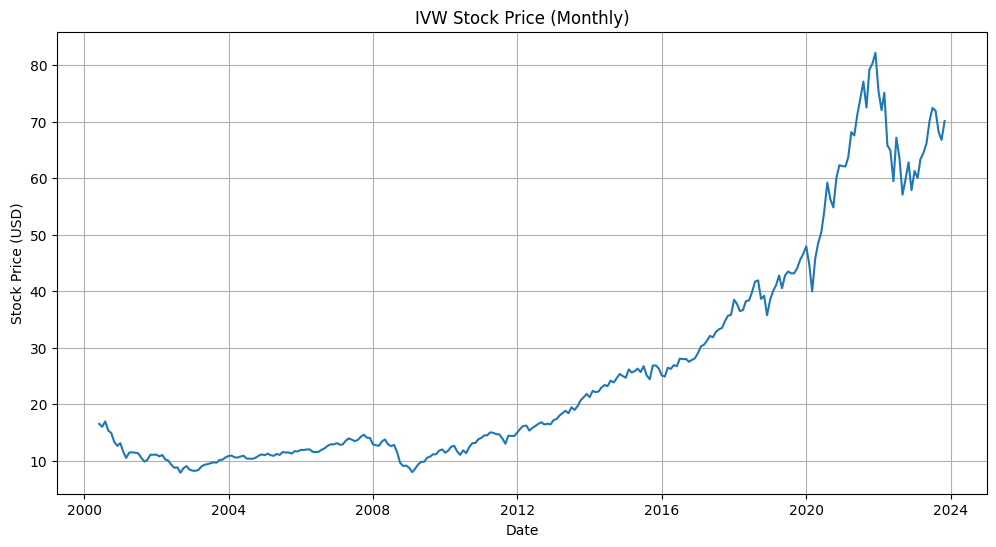

In [110]:
def plot_price(ticker, start_date):
    # Download stock data from Yahoo Finance
    stock_data = yf.download(ticker, start=start_date, interval='1mo')

    # Resample data to monthly frequency
    stock_data['Returns'] = stock_data['Adj Close'].pct_change().dropna()

    # Plot the stock price
    plt.figure(figsize=(12, 6))
    plt.plot(stock_data['Adj Close'], linestyle='-')
    plt.title(f'{ticker} Stock Price (Monthly)')
    plt.xlabel('Date')
    plt.ylabel('Stock Price (USD)')
    plt.grid(True)
    plt.show()
    
plot_price("IVW", "2000-01-01")

[*********************100%***********************]  1 of 1 completed

Summary of Monthly Returns:
count    281.000000
mean       0.006257
std        0.046660
min       -0.162239
25%       -0.016945
50%        0.010171
75%        0.034618
max        0.146154
Name: Returns, dtype: float64


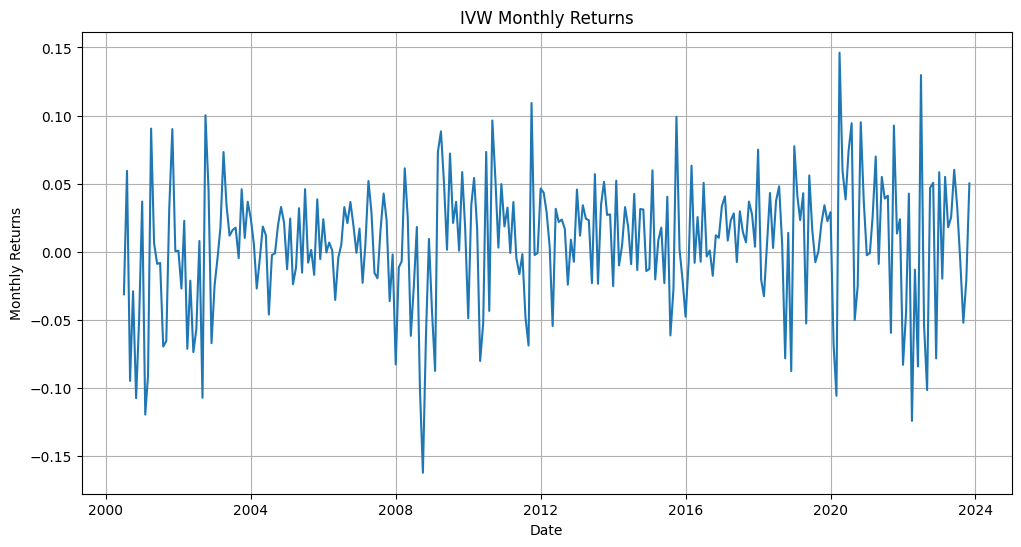

In [111]:
def calculate_monthly_returns(ticker, start_date):
    # Download stock data from Yahoo Finance
    stock_data = yf.download(ticker, start=start_date, interval='1mo')

    # Resample data to monthly frequency
    stock_data['Returns'] = stock_data['Adj Close'].pct_change().dropna()

    # Print summary
    print("\nSummary of Monthly Returns:")
    print(stock_data['Returns'].describe())
    
    return stock_data['Returns']

def plot_monthly_returns(ticker, start_date):
    # Calculate monthly returns
    monthly_returns = calculate_monthly_returns(ticker, start_date)

    # Plot the monthly returns
    plt.figure(figsize=(12, 6))
    plt.plot(monthly_returns, linestyle='-')
    plt.title(f'{ticker} Monthly Returns')
    plt.xlabel('Date')
    plt.ylabel('Monthly Returns')
    plt.grid(True)
    plt.show()

plot_monthly_returns("IVW", "2000-01-01")

### Comments: 
#### The mean of the monthly returns is 0.006084 showing that ETF provides an overall positive return. 
#### Standard deviation of 0.046680 shows us the tendency of monthly returns to be close to the mean, which also indicates a moderate level of volatility. 
#### Minimum is -0.162240 and max is 0.146154, meaning that some months will prompt substantial returns and drawdowns. 
#### Percentiles show us a narrow interquantile range (IQR), indicating a concentrated distribution of returns. Overall, ETF apprears to be generally stable in terms of performance.

### -------------------------------------------------------------------------------------------------------------
### (2) In the spirit of seasonality, calculate the average return for each calendar month. Also,
### – Identify the month with the maximum average return and test if it statistically different than other months.
### – Identify the month with the minimum average return and test if it statistically different than other months. 

#### Well, let's start with the seasonality model and take a look at the monthly returns on the interactive plot

In [112]:
# We need interactive plots to view the average percentage returns on each month
import plotly.graph_objs as go
from plotly.subplots import make_subplots

[*********************100%***********************]  1 of 1 completed


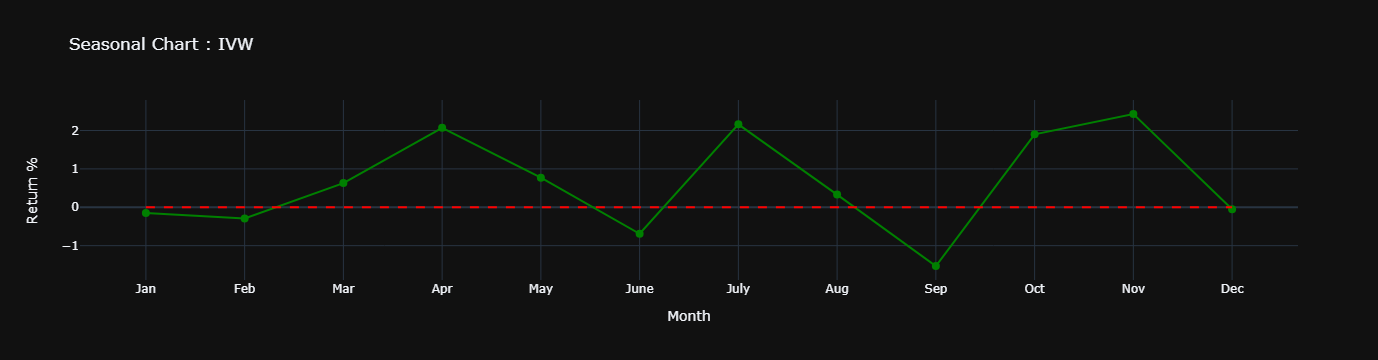

,Jan,Feb,Mar,Apr,May,June,July,Aug,Sep,Oct,Nov,Dec
2001,3.872874,-12.509034,-9.016679,9.077091,0.802870,-0.783032,-0.736633,-7.050128,-6.468935,3.275191,8.475675,0.141598
2002,-0.020421,-2.594454,2.334862,-7.410463,-1.859070,-7.423248,-5.287266,1.250622,-11.003805,9.774107,4.598129,-6.848952
2003,-2.601926,-0.235139,2.102293,6.928786,3.487658,1.264942,1.400256,1.824524,-0.382222,4.281737,1.069925,3.652132
2004,2.084380,0.593442,-2.637278,-0.674859,1.878269,1.244304,-4.913950,-0.175326,-0.070844,1.667666,3.277317,2.180519
2005,-2.151312,2.453859,-2.373479,-1.511840,3.186768,-1.507902,4.315821,-0.748975,0.167157,-1.980123,3.802393,-0.513365
2006,2.124347,-0.017357,0.701442,-0.136903,-3.523836,-0.340780,0.258680,3.250030,2.104710,3.292687,1.933504,-0.056761
2007,1.369595,-2.216103,0.587136,4.774085,2.938669,-1.500911,-2.155140,1.798727,4.257296,2.069364,-3.467476,-0.064044
2008,-8.701802,-1.007455,-0.441247,5.780599,2.568012,-6.224554,-2.753975,1.921998,-9.888762,-15.468932,-4.617176,1.665704
2009,-4.552149,-8.750237,7.878948,8.319068,5.225050,0.307113,6.705621,2.190998,3.680845,-0.126806,5.776077,1.784610
2010,-5.289548,3.516041,5.313059,1.415996,-7.955964,-5.089439,6.859022,-4.309515,9.298121,4.958566,0.397530,4.891626


In [113]:
def Seasonality_Dynamic(ticker, start=None, end=None):

    if start == None:
        start = "2020-01-01"
    else:
        start = start
    if end == None:
        end = date.today()
    else:
        end = end
        
    price = yf.download(ticker, start, end)
    df = pd.DataFrame({'return': price['Close'].pct_change().fillna(0)})

    months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    df = df[df.index >= df[df.index.month == 1].index[0]]
    df = df[df.index <= df[df.index.month == 12].index[-1]]
    
    # Seasonal data
    seasonal_data = {}
    for year in df.index.year.unique():
        seasonal_data[year] = df[df.index.year == year].reset_index()['return']
    seasonal_data = pd.DataFrame(seasonal_data)
    
   # Monthly Cumulative Returns
    year_long = seasonal_data[-1:].T.dropna().index[0]
    seasonal_data.index = df[df.index.year == year_long].index.strftime('%Y%m')
    seasonal_returns = seasonal_data.dropna(how='all').groupby(seasonal_data.index).cumsum()
    seasonal_returns.reset_index(drop=True, inplace=True)
    seasonal_returns = seasonal_returns.dropna(how='all').mean(axis=1) 
    
    # Monthly Data Summary
    monthly = {}
    for year in df.index.year.unique():
        yeardf = df[df.index.year == year]
        monthly[year] = yeardf.groupby(yeardf.index.month).sum() * 100

    data = pd.concat(monthly, axis=1)
    data.columns = [col[0] for col in data.columns]
    data.index = months

    summary = pd.DataFrame(data.mean(axis=1))
    summary.columns = ['Return %']
    
    # Create a line plot using plotly.graph_objs
    fig = go.Figure()

    # Add a line trace for the summary data
    fig.add_trace(go.Scatter(
        x=summary.index,
        y=summary['Return %'].round(2),
        mode='lines+markers',
        name='Monthly Returns',
        line=dict(color='green'),
        marker=dict(size=8, color='green')
    ))

    # Set plot title and axis labels
    fig.update_layout(
        title=f'Seasonal Chart : {ticker}',
        xaxis=dict(title='Month'),
        yaxis=dict(title='Return %'),
        template='plotly_dark'
    )
    # Add a zero line to the plot
    fig.add_shape(
        type="line",
        x0=summary.index[0],
        y0=0,
        x1=summary.index[-1],
        y1=0,
        line=dict(color="red", dash="dash")
    )

    # Show the plot
    fig.show()
    
    data_df = pd.DataFrame(data.T)
    return data_df

Seasonality_Dynamic("IVW", "2000-01-01")

### Comments: 
#### So we can see that we have the periods of highest returns at April (2.07%), July (2.16%) and November (2.43%). We will use November as Max.
#### The worst drawdowns are shown at June (-0.69) and September (-1.53). We will use September as Min.
#### So, we will just update our simple regression model from previous project and set the index as a variable of the function.

In [114]:
# We need to add the additional library statsmodels at this point
import statsmodels.formula.api as smf

In [115]:
def simple_regression(ticker, month_index, start_date):
    stock_data = yf.download(ticker, start=start_date, interval='1mo')
    stock_data['Returns'] = stock_data['Adj Close'].pct_change()

    # Create a dummy variable for January
    stock_data['Selected_Month'] = (stock_data.index.month == month_index).astype(int)

    # Run regression
    model = smf.ols("Returns ~ Selected_Month", data = stock_data.dropna()).fit()

    # Print regression summary
    print(model.summary())

### Let's start with November

In [116]:
simple_regression("IVW", 10, "2000-01-01")

[*********************100%***********************]  1 of 1 completed
                            OLS Regression Results                            
Dep. Variable:                Returns   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.594
Date:                Thu, 09 Nov 2023   Prob (F-statistic):              0.208
Time:                        09:17:57   Log-Likelihood:                 463.81
No. Observations:                 281   AIC:                            -923.6
Df Residuals:                     279   BIC:                            -916.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------

### Comments: 
#### In a quick glance, we can see the p-value for the Selected_Month is 0.208, which is considerably higher than the accepted level of 0.05. 
#### R-Squared is also shown as 0.006.
#### This already shows us that the model failed to provide a meaningful explanation for the variation of returns in November.

### Then let's check with September

In [117]:
simple_regression("IVW", 9, "2000-01-01")

[*********************100%***********************]  1 of 1 completed
                            OLS Regression Results                            
Dep. Variable:                Returns   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     8.645
Date:                Thu, 09 Nov 2023   Prob (F-statistic):            0.00355
Time:                        09:17:58   Log-Likelihood:                 467.29
No. Observations:                 281   AIC:                            -930.6
Df Residuals:                     279   BIC:                            -923.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------

### Comments: 
#### Now we have a p-value of 0.004 for the Selected_Month, which is less than 0.05, indicating that returns of September is indeed statistically different from other months.
#### Yet the small R-squared value of 0.03 shows that the Selected_Month explains a very small portion of the variation in the dependent variable (Returns). It's still not a very good fit.
#### Confidence intervals of -0.048 to -0.010 further supports the evidence of a negative impact on returns in September.
#### Overall, we seem to have an improvement in this model's ability to explain the negative returns in September, compared to the previous one.

### -------------------------------------------------------------------------------------------------------------
### (3) Using the risk factors estimate risk-adjusted alphas and comment on whether the ETF creates any
### value. Also,
### – Comment on the risk factors you identified the ETF is exposed to. In other words, which risks
### does this ETF take?
### – Explain how ETF returns would be affected from risk factors you identified above.


### -------------------------------------------------------------------------------------------------------------
### Comments: 
#### In this case, we start with a look at CAPM formula:

## $$ \sum R_i = R_f + \beta_i * \sum(R_m - R_f) $$

#### Yet, we will use all the factors in regression with this ETF.

### $$ R_i = R_f + \beta_1 * (R_m - R_f) + \beta_2 (SMB) + \beta_3 (HML) + .... + \beta_5 (MOM) + \alpha $$

#### The ones with positive coefficient will give us an idea about which risk factors affect the performance.

In [103]:
# We need to add pandas at this point since this will require operations with dataframes
import pandas as pd

In [104]:
def test_factorsdata(etf_ticker, start):
    # Let's download the ETF data from yfinance and read the csv file for factors data
    etf_data = yf.download(etf_ticker, start, interval='1mo')
    
    # Start with a better date index
    factors_data = pd.read_csv("factors_data.csv", index_col='date')
    factors_data.index = pd.to_datetime(factors_data.index, format = '%Y%m')

    # We need to perform some data cleaning, drop the Unnamed columns with all NaN values
    factors_data = factors_data.dropna(axis=1, how='all')

    # Merge the percentage returns with factors data based on date
    merged_data = pd.merge(factors_data, etf_data['Adj Close'], how='outer', left_index=True, right_index=True).dropna()

    # Since we used them with %Y%m format in index, we won't need the columns of year and month
    merged_data = merged_data.drop("year", axis=1)
    merged_data = merged_data.drop("month", axis=1)
    
    # Obtain the percentage returns for the ETF
    merged_data['Returns'] = merged_data['Adj Close'].pct_change()
    merged_data = merged_data.dropna()
    merged_data = merged_data.drop("Adj Close", axis=1)

    # Here we multiplied the Returns with 100 to show it as a percentage similar to MktRF
    merged_data['Returns'] = merged_data['Returns'] * 100 
    # Then we obtain the Excess returns by substracting returns from risk-free rate
    merged_data['Excess'] = merged_data['Returns'] - merged_data['RF']
    print(merged_data)

    # Now we create our OLS model, put the returns on left hand side and all our risk factors and their beta to the right
    complete_model = smf.ols('Excess ~ MktRF + SMB + HML + RMW + CMA + MOM', data = merged_data).fit()
    print(complete_model.summary())

In [105]:
test_factorsdata("IVW", "2000-01-01")

[*********************100%***********************]  1 of 1 completed
            MktRF   SMB    HML    RMW   CMA   MOM    RF    Returns     Excess
2000-07-01  -2.51 -1.03   8.31   5.83  2.94 -0.05  0.48  -3.122869  -3.602869
2000-08-01   7.03 -1.03  -1.39  -3.22  1.10  5.73  0.50   5.941849   5.441849
2000-09-01  -5.45  0.19   7.17   2.56  5.53  1.97  0.51  -9.478343  -9.988343
2000-10-01  -2.76 -2.65   5.71   9.61  3.80 -4.48  0.56  -2.903677  -3.463677
2000-11-01 -10.72 -0.58  12.30  13.07  8.43 -2.32  0.51 -10.753071 -11.263071
...           ...   ...    ...    ...   ...   ...   ...        ...        ...
2023-03-01   2.51 -6.94  -8.85   2.24 -2.37 -2.49  0.36   5.498672   5.138672
2023-04-01   0.61 -2.56  -0.04   2.42  2.86  1.63  0.35   1.797524   1.447524
2023-05-01   0.35 -0.38  -7.72  -1.81 -7.22 -0.63  0.36   2.529304   2.169304
2023-06-01   6.46  1.34  -0.26   2.18 -1.62 -2.39  0.40   6.016839   5.616839
2023-07-01   3.21  2.86   4.13  -0.56  0.62 -4.06  0.45   3.318311   2.86

#### Now we can see that the model has adjusted R-squared value of 0.97 and F-statistic of 1426., which are very high and implying a robust model.
#### Our Intercept is -0.0288, signaling an underperforming alpha for the ETF. 
#### We obtain regular values on diagnostics such as Omnibus, Durbin-Watson and Jarque-Bera; pointing out to a distribution that's mostly normal.
#### MktRF being high is a no surprise, but the RMW and MOM coefficients showing positive implies that those are the ones that would affect the performance of ETF.
#### However, the P-value for MOM is higher than 0.05, so its relationship with excess returns might not be significant.
#### In this case, we can assume that ETF has negative exposure to the factors of SMB, HML, CMA and a positive exposure to the RMW.

### -------------------------------------------------------------------------------------------------------------
### (4) Using the industry portfolio returns estimate the ETF’s exposure to various industries. Comment
### on your findings. Also,
### – Identify the largest industry exposure of the ETF and test whether this exposure is similar before
### and after 2019.
### -------------------------------------------------------------------------------------------------------------

In [106]:
def test_industryrets(etf_ticker, start):
    # Let's download the ETF data from yfinance and read the csv file for factors data
    etf_data = yf.download(etf_ticker, start, interval='1mo')
    
    # Start with a better date index
    industry_data = pd.read_csv("industry_portfolios.csv", index_col='date')
    industry_data.index = pd.to_datetime(industry_data.index, format = '%Y%m')

    # Merge the percentage returns with factors data based on date
    merged_data = pd.merge(industry_data, etf_data['Adj Close'], how='outer', left_index=True, right_index=True).dropna()

    # Since we used them with %Y%m format in index, we won't need the columns of year and month
    merged_data = merged_data.drop("year", axis=1)
    merged_data = merged_data.drop("month", axis=1)
    
    # Obtain the percentage returns for the ETF
    merged_data['Returns'] = merged_data['Adj Close'].pct_change()
    merged_data = merged_data.dropna()
    merged_data = merged_data.drop("Adj Close", axis=1)

    # Here we multiplied the Returns with 100 to show it as a percentage similar to MktRF
    merged_data['Returns'] = merged_data['Returns'] * 100 
    print(merged_data)

    # Again we have our Returns on left hand side and industry factors on the right
    formula = 'Returns ~ NoDur + Durbl + Manuf + Enrgy + HiTec + Telcm + Shops + Hlth + Utils + Other'
    complete_model = smf.ols(formula, data = merged_data).fit()
    print(complete_model.summary())
    
    # And for the second part of the question, we create a dummy variable
    merged_data["post2019"] = 0
    merged_data.loc[merged_data.index >= '2019-01-01', 'post2019'] = 1
    
    # Call the new model
    model2019 = smf.ols("Returns ~ HiTec * post2019", data=merged_data).fit()
    print(model2019.summary())

In [107]:
test_industryrets("IVW", "2000-01-01")

[*********************100%***********************]  1 of 1 completed
            NoDur  Durbl  Manuf  Enrgy  HiTec  Telcm  Shops  Hlth  Utils  \
2000-07-01   0.72   4.86  -1.48  -2.58  -5.18  -7.46  -1.23 -6.47   4.21   
2000-08-01  -2.08   5.36   7.38   8.74  12.68  -1.39  -2.39  3.46  11.76   
2000-09-01   3.71  -4.31  -5.69   4.51 -14.82  -3.35   2.66  3.71   9.16   
2000-10-01   7.74   2.47   3.51  -2.90  -7.48  -0.24  -1.83  2.08  -1.81   
2000-11-01   2.74 -11.53  -3.13  -2.53 -23.16 -15.46  -1.04  0.75   3.06   
...           ...    ...    ...    ...    ...    ...    ...   ...    ...   
2023-03-01   3.13  -0.62   0.37  -0.32  10.33  -0.13   3.49  2.49   3.89   
2023-04-01   3.16 -15.24  -0.58   2.59   0.26   0.99   2.19  4.12   1.72   
2023-05-01  -5.35  13.52  -5.54  -9.51   8.23  -9.40   0.62 -3.67  -5.82   
2023-06-01   2.84  24.66  10.69   6.42   5.91   4.63   7.89  4.66   2.61   
2023-07-01   2.32   2.74   3.20   7.35   4.29   0.98   2.28 -0.12   2.79   

            Other 

### Comments: 
#### Once again we obtain a good R-Squared value and F-statistic showing a good fit.
#### Coefficients show us that the largest exposure is to HiTec, followed by Hlth and Shops.

#### In the second part, we check for a change in exposure to the HiTec before and after 2019.
#### HiTec:post2019 shows a change by 0.3088, meaning that ETF's exposure to HiTec industry is increased.

### ======================================================================
## Project by: 
## N. Emir Eğilli, Burak Kargın, Bilal Öner Arat, Irmak Okçu
#### Full repository available at: https://github.com/OZUFERM2023/FERM-533---Applied-Econometrics